In [60]:
# Import required libraries
import tensorflow as tf
import os
import numpy as np
import pretty_midi
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
# Define globals
data_directory = './/data'  #dataset path
fs = 5  # Sampling frequency for piano rolls
# Function to load midi files, composer labels and compser map in seperate arrays

labeled_midi_data = {}

def load_midi_data_and_labels(directory):
    skipped_files = []    # Keep track of skipped files due to errors
    data = []
    composers = []
    num_composer_map = {}
    # Function to recursively iterate files in a directory
    def iterate_dir(dir_path, label, composer):        
        # Check direct .mid files in current directory
        for item in os.listdir(dir_path):
            item_path = os.path.join(dir_path, item)
            if os.path.isfile(item_path) and item_path.endswith('.mid'):
                try:
                    # Load the MIDI file
                    midi_data = pretty_midi.PrettyMIDI(item_path)
                    data.append(midi_data)
                    composers.append(label)
                    if label not in labeled_midi_data:
                        labeled_midi_data[label] = []
                    labeled_midi_data[label].append(midi_data)

                except Exception as e:  # Catch any exception that might be raised
                    print(f"Skipping file {item_path} due to an error: {e}")
                    skipped_files.append(item_path)
            elif os.path.isdir(item_path):
                iterate_dir(item_path, label, composer)
        print(f"Number of files skipped due to error: {len(skipped_files)}")
        return

    # Process each composer's directory in the root directory
    for label, composer in enumerate(sorted(os.listdir(directory))):
        composer_path = os.path.join(directory, composer)
        if os.path.isdir(composer_path):
            num_composer_map[label] = composer
            iterate_dir(composer_path, label, composer)

    return np.array(data), np.array(composers), num_composer_map


In [61]:
midi_data, composer_labels, composer_map = load_midi_data_and_labels(data_directory)
midi_data.shape
print(labeled_midi_data.keys())

Number of files skipped due to error: 0
Skipping file .//data\Beethoven\Anhang 14-3.mid due to an error: Could not decode key with 3 flats and mode 255
Number of files skipped due to error: 1
Number of files skipped due to error: 1


c:\Users\kflin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Number of files skipped due to error: 1
dict_keys([0, 1, 2, 3])


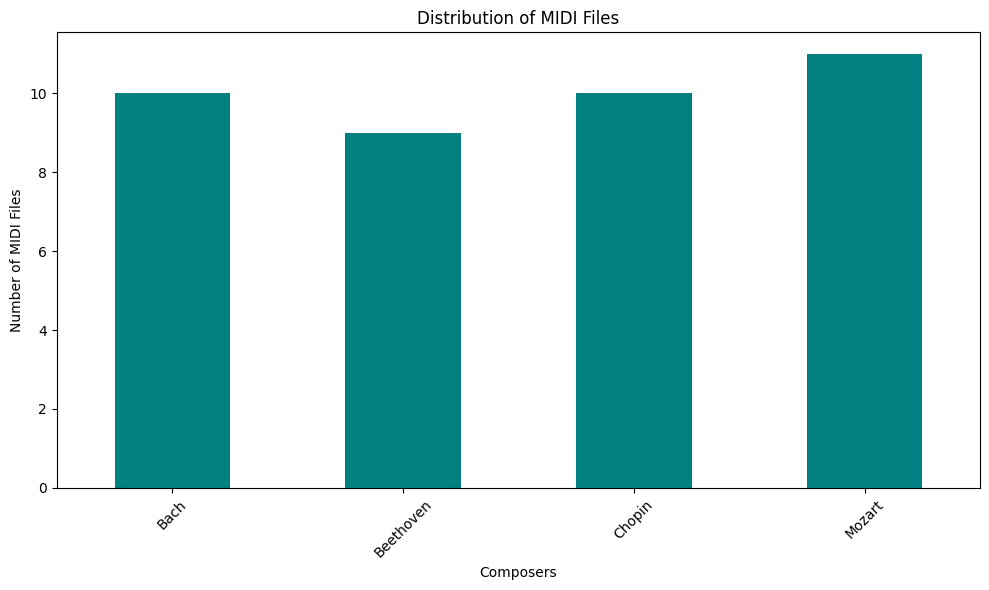

In [62]:
# Explore the MIDI data

# Convert list to pandas Series
composer_series = pd.Series(composer_labels)
# Count of each label
label_counts = composer_series.value_counts().sort_index()
# Map label counts to composer names
composer_counts = label_counts.rename(index=composer_map)
def plot_midi_distribution(composer_counts):
    # Plotting the data
    plt.figure(figsize=(10, 6))
    composer_counts.plot(kind='bar', color='teal')
    plt.xlabel('Composers')
    plt.ylabel('Number of MIDI Files')
    plt.title('Distribution of MIDI Files')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
    plt.show()

plot_midi_distribution(composer_counts)


Instrument(program=0, is_drum=False, name="Track 1")
Instrument(program=19, is_drum=False, name="Track 2")
Instrument(program=0, is_drum=False, name="Track 3")
Instrument(program=19, is_drum=False, name="Track 1")
Instrument(program=0, is_drum=False, name="Track 2")
Instrument(program=0, is_drum=False, name="Track 3")
Instrument(program=19, is_drum=False, name="Track 1")
Instrument(program=0, is_drum=False, name="Track 2")
Instrument(program=0, is_drum=False, name="Track 3")
Instrument(program=19, is_drum=False, name="Track 1")
Instrument(program=0, is_drum=False, name="Track 2")
Instrument(program=0, is_drum=False, name="Track 3")
Instrument(program=19, is_drum=False, name="Track 1")
Instrument(program=0, is_drum=False, name="Track 2")
Instrument(program=0, is_drum=False, name="Track 3")
Instrument(program=19, is_drum=False, name="Track 1")
Instrument(program=0, is_drum=False, name="Track 2")
Instrument(program=0, is_drum=False, name="Track 3")
Instrument(program=0, is_drum=False, nam

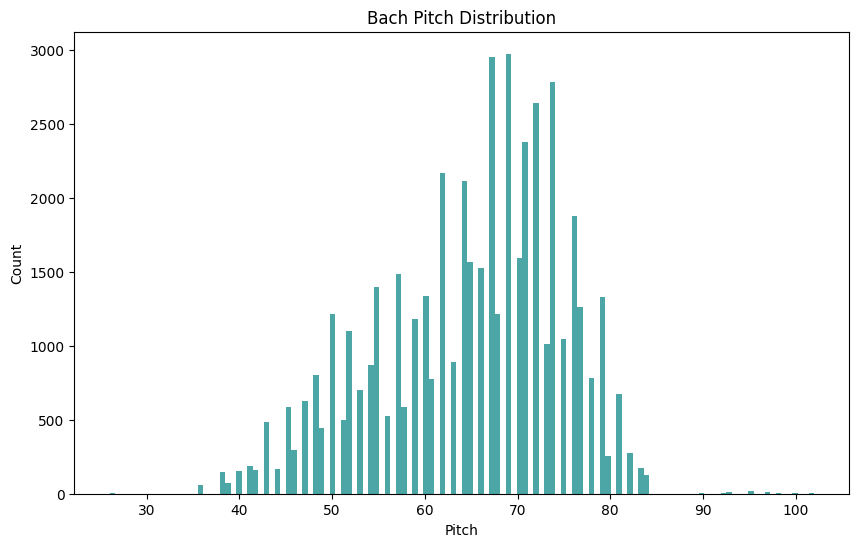

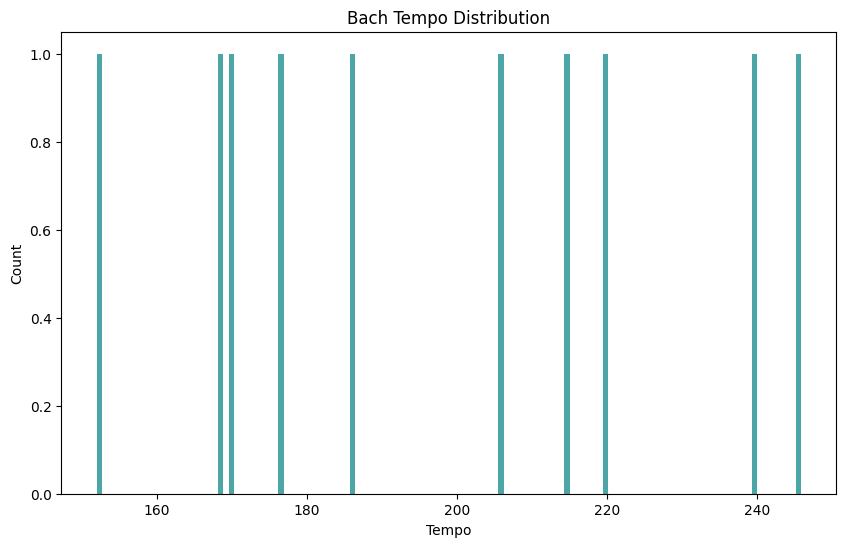

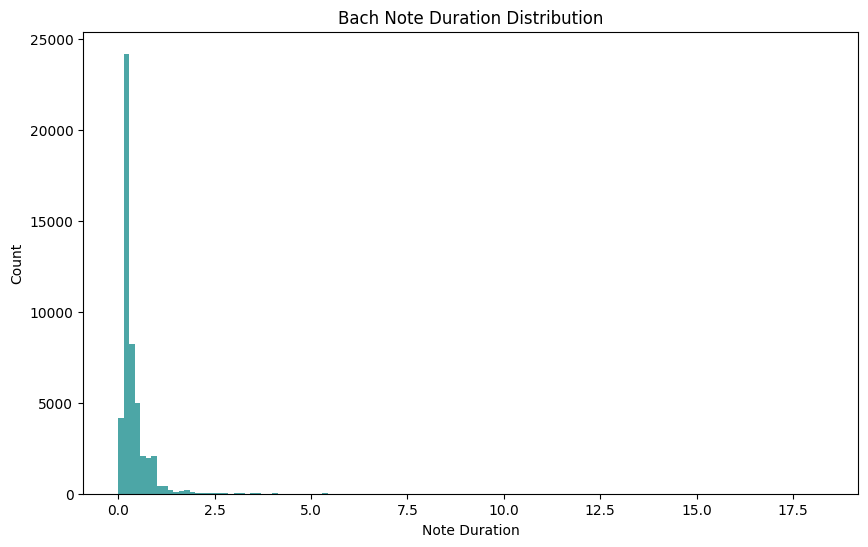

Instrument(program=0, is_drum=False, name="Copyright Reg 2001")
Instrument(program=0, is_drum=False, name="Reginald Steven Ritchie")
Instrument(program=0, is_drum=False, name="PianoR")
Instrument(program=0, is_drum=False, name="PianoL")
Instrument(program=0, is_drum=False, name="primo")
Instrument(program=0, is_drum=False, name="primo")
Instrument(program=0, is_drum=False, name="secondo")
Instrument(program=0, is_drum=False, name="secondo")
Instrument(program=0, is_drum=False, name="PIANO               ")
Instrument(program=0, is_drum=False, name="Copyright 2001 Reg")
Instrument(program=0, is_drum=False, name="Reginald Steven Ritchie")
Instrument(program=0, is_drum=False, name="Copyright 2001 Reg")
Instrument(program=0, is_drum=False, name="Reginald Steven Ritchie")
Instrument(program=0, is_drum=False, name="Copyright 2001 Reg")
Instrument(program=0, is_drum=False, name="Reginald Steven Ritchie")
Instrument(program=0, is_drum=False, name="Copyright 2001 Reg")
Instrument(program=0, is_d

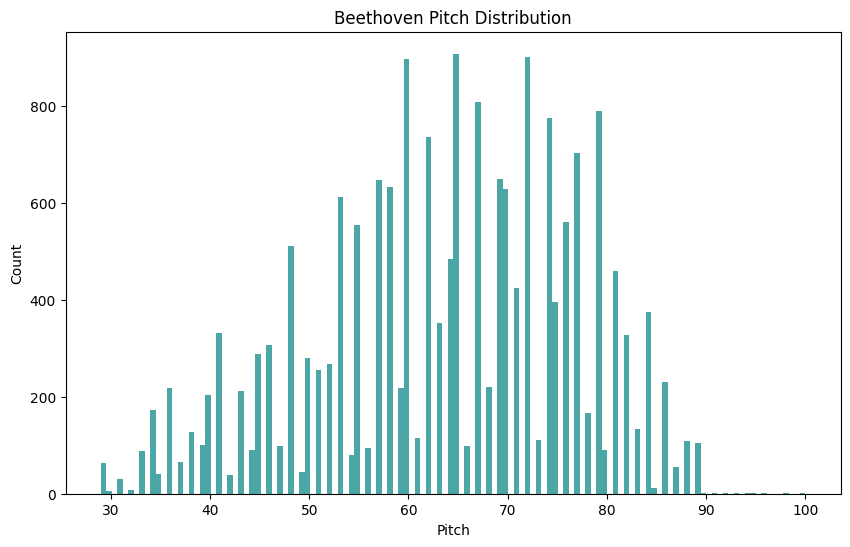

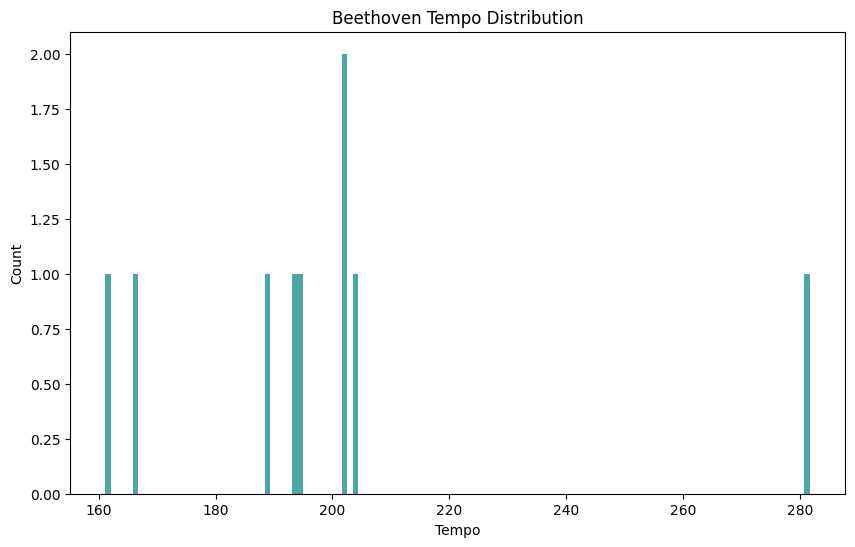

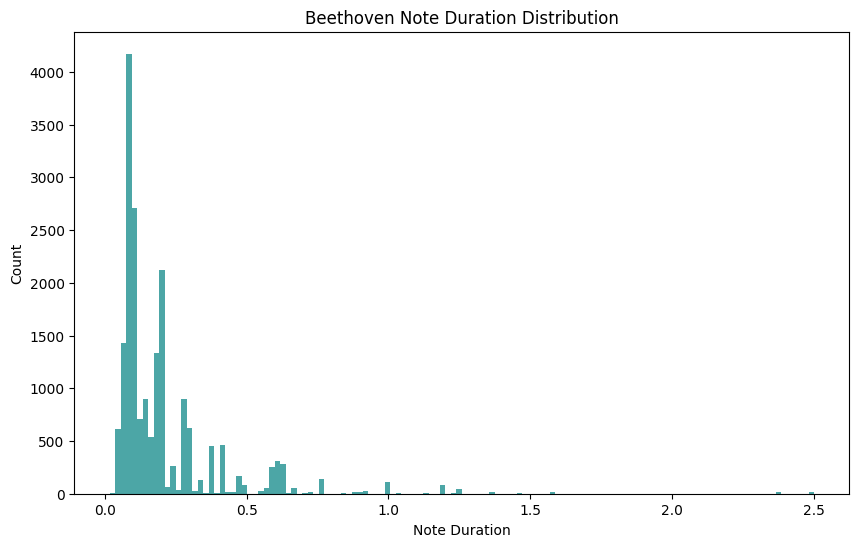

Instrument(program=0, is_drum=False, name="Piano")
Instrument(program=53, is_drum=False, name="Voice")
Instrument(program=0, is_drum=False, name="Piano")
Instrument(program=53, is_drum=False, name="Voice")
Instrument(program=0, is_drum=False, name="Piano")
Instrument(program=53, is_drum=False, name="Voice")
Instrument(program=0, is_drum=False, name="Piano")
Instrument(program=53, is_drum=False, name="Voice")
Instrument(program=0, is_drum=False, name="Piano")
Instrument(program=53, is_drum=False, name="Voice")
Instrument(program=0, is_drum=False, name="Piano")
Instrument(program=53, is_drum=False, name="Voice")
Instrument(program=0, is_drum=False, name="Piano")
Instrument(program=53, is_drum=False, name="Voice")
Instrument(program=0, is_drum=False, name="Piano")
Instrument(program=53, is_drum=False, name="Voice")
Instrument(program=0, is_drum=False, name="Piano")
Instrument(program=53, is_drum=False, name="Voice")
Instrument(program=0, is_drum=False, name="R Treble")
Instrument(program=

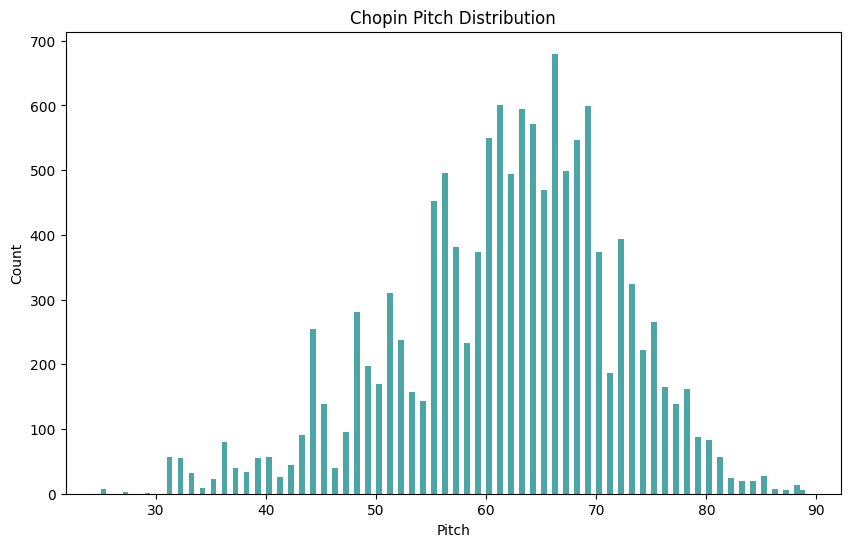

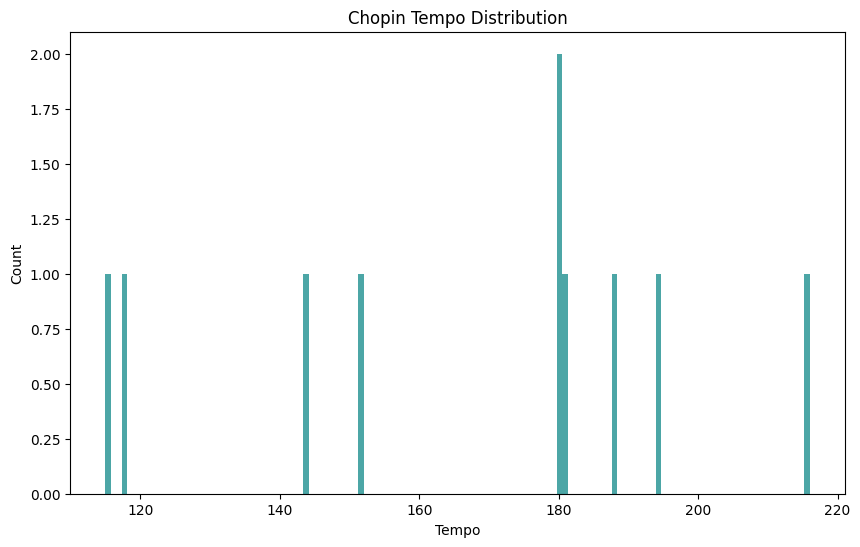

KeyboardInterrupt: 

In [63]:
def plot_distribution(pitches, composer, xlabel):
    plt.figure(figsize=(10, 6))
    plt.hist(pitches, bins=128, color='teal', alpha=0.7)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.title(f"{composer} {xlabel} Distribution")
    plt.show()

for composer, midi_files in labeled_midi_data.items():
    pitches = []
    tempos = []
    notes_duration = []

    for midi in midi_files:
        
        for instrument in midi.instruments:
            for note in instrument.notes:
                pitches.append(note.pitch)
                notes_duration.append(note.end - note.start)
        
        tempos.append(midi.estimate_tempo())


    print(f"Composer: {composer_map[composer]}")
    print(f"Number of pitches: {len(pitches)}")
    print(f"Unique pitches: {len(set(pitches))}")
    print(f"Average tempos: {np.mean(tempos)}")
    print(f"Mean note duration: {np.mean(notes_duration)}")
    print(pitches[:10])

    plot_distribution(pitches, composer_map[composer], 'Pitch')
    plot_distribution(tempos, composer_map[composer], 'Tempo')
    plot_distribution(notes_duration, composer_map[composer], 'Note Duration')


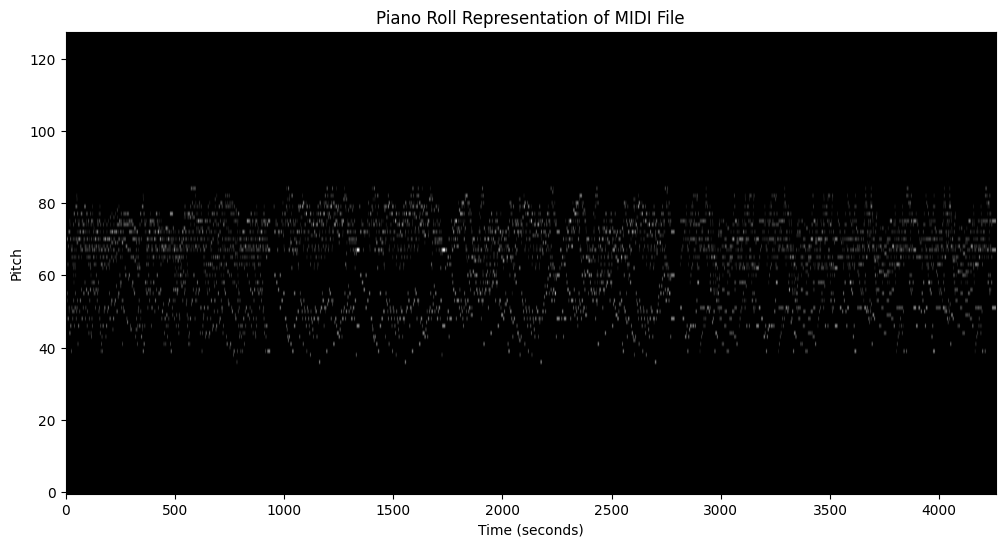

In [ ]:
# Randomly select a MIDI file to visualize
midi_file = midi_data[0]
# Plot the piano roll
plt.figure(figsize=(12, 6))
plt.imshow(midi_file.get_piano_roll(fs=fs), origin='lower', aspect='auto', cmap='gray')
plt.xlabel('Time (seconds)')
plt.ylabel('Pitch')
plt.title('Piano Roll Representation of MIDI File')
plt.show()
